# ORIE 4580/5580/5581 Assignment 3

#### Students: Minjia Tang (mt896) and Xiaoyang Lyu (xl2265)

### Github link: [example Github link](https://github.com/SidBanerjee/ORIE4580-Simulation/blob/main/Notebooks/Unit0-Intro_Demos.ipynb)

(**Please replace this with your own link!**)

### Instructions


* Due Thursday September 25, at 11.59pm on Gradescope.
* Assignment .ipynb files available for download on [Canvas](https://canvas.cornell.edu/courses/80773#:~:text=Assignments-,Assignments,-Assignments%20module%20publish).
* Do all your work in provided notebook (text answers typeset in markdown; show all required code and generate plots inline), and then generate and submit a pdf.
* Ideally do assignments in groups of 2, and submit a single pdf with both names
* Please show your work and clearly mark your answers.
* You can use any code fragments given in class, found online (for example, on StackOverflow), or generated via Gemini/Claude/ChatGPT (you are encouraged to use these for first drafts) **with proper referencing**.
* You can also discuss with others (again, please reference them if you do so); but you must write your final answers on your own as a team.




### Suggested reading

Chapters 7 (you can skim through this), and chapters 8 and 9 of [Introduction to Probability](https://chance.dartmouth.edu/teaching_aids/books_articles/probability_book/book.html) by Grinstead and Snell.

Chapter 3 and chapter 4 (up to section 4.5) of [Simulation by Ross](https://catalog.library.cornell.edu/catalog/12745977).

In [ ]:
#importing necessary packages
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats
%matplotlib inline

<hr><hr>

## Question 1: Combining LCGs (20 points)

In order to avoid biases, simulations should not use anywhere near the full period of an LCG (otherwise, the random sequence repeats\ldots). For example, a typical traffic simulator may have $10,000$ vehicles, each experiencing thousands of random disturbances, thus needing around $10^7$ random samples per replication -- for this, an LCG using $m=2^{31}-1\approx 2\times 10^9$ is insufficient, as after $100$ replications the sequences get correlated.

One method to combine multiple LCGs to obtain a generator with a longer period is to add a smaller period LCG to it. For example, suppose we have two generators $X_{n+1}  =  (a_1 X_n) \mbox{ mod } m_1$ and $Y_{n+1}  =  (a_2 Y_n) \mbox{ mod } m_2$, with $m_1>m_2$. We can derive a combined generator by setting $Z_n  =  (X_n + Y_n) \mbox{ mod } m_1$. If properly designed, the resulting period can be on the order of $m_1m_2$. We will now study a small example to see how this works.


<hr>

**(a)** Consider two LCGs, $x_{n+1} = (5 x_n) \mod 16$ and $y_{n+1} = (2 y_n) \mod 7$. Starting both with seed $x_0 = y_0 = 1$, plot the sequences $x_n, y_n$ using the clock visualization introduced in class (separate plot for each sequence; you can use and modify the code in Demo-PRNGs.ipynb on Canvas).

<hr>

In [ ]:
# Functions to visualize LCG sequence on clock (see demo notebook)
def plot_clock_face(m, fig, annotate=False):
    """
    Plot points on a unit circle representing the LCG sequence on a clock face.

    Parameters:
    m (int): The modulus value for the LCG sequence.
    fig (matplotlib.figure.Figure): The figure object to draw on.
    annotate (bool): Whether to annotate points with their index.

    Returns:
    None
    """
    # Plot m points on the unit circle
    for i in range(m):
        theta = 2.0 * np.pi * i / m
        plt.plot(np.sin(theta), np.cos(theta), 'rs', markersize = 10)
        if annotate:
            plt.annotate(str(i), (np.pi/2 - theta, 1.05), xycoords='polar')

def plot_clock_path(m, x, fig, color='y'):
    """
    Plot the path of an LCG sequence on a clock face.

    Parameters:
    m (int): The modulus value for the LCG sequence.
    x (numpy.ndarray): The LCG sequence.
    fig (matplotlib.figure.Figure): The figure object to draw on.
    color (str): The color for the path.

    Returns:
    None
    """
    # Plot the seed node
    theta_0 = 2.0 * np.pi * (x[0] * (m + 1) - 1) / m
    plt.plot(np.sin(theta_0), np.cos(theta_0), 'gs', markersize = 10)

    # Plot the path of the LCG sequence
    for i in range(len(x) - 1):
        theta_start = 2.0 * np.pi * (x[i] * (m + 1) - 1) / m
        theta_end = 2.0 * np.pi * (x[i + 1] * (m + 1) - 1) / m
        x_start = np.sin(theta_start)
        y_start = np.cos(theta_start)
        del_x = np.sin(theta_end) - np.sin(theta_start)
        del_y = np.cos(theta_end) - np.cos(theta_start)
        if abs(del_x) > 0 or abs(del_y) > 0:
            plt.arrow(x_start, y_start, del_x, del_y,
                      length_includes_head=True, head_width=0.05, head_length=0.1, fc=color, ec=color)

In [ ]:
# Function to generate pseudorandom sequence using LCG
# Set default parameters to glibc specifications (see demo notebook)
def LCG(n, m=2**31-1, a=1103515245, c=12345, seed=1):
    """
    Generate a pseudorandom sequence using a Linear Congruential Generator (LCG).

    Parameters:
    n (int): The number of pseudorandom numbers to generate.
    m (int): The modulus value (default is 2^31-1, following glibc specifications).
    a (int): The multiplier value (default is 1103515245, following glibc specifications).
    c (int): The increment value (default is 12345, following glibc specifications).
    seed (int): The initial seed value (default is 1).

    Returns:
    numpy.ndarray: An array of pseudorandom numbers in the range [0, 1).
    """
    # Initialize an array to store the generated pseudorandom numbers
    output = np.zeros(n)

    x = seed
    for i in range(n):
        # Calculate the pseudorandom number and normalize it to [0, 1)
        output[i] = (x + 1.0) / (m + 1.0)

        # Update the LCG state using the specified parameters
        x = (a * x + c) % m

    return output

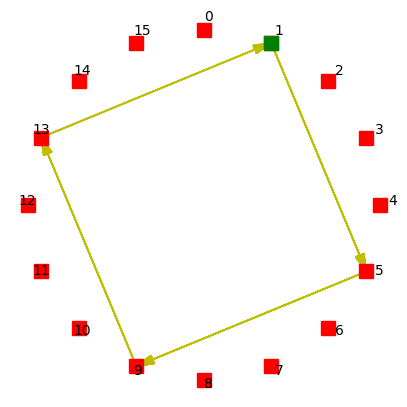

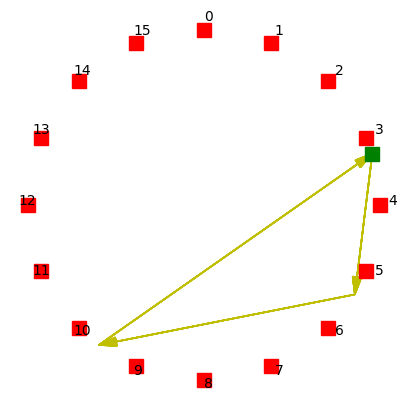

In [ ]:
# Ans
m_1 = 16
m_2 = 7
a_1 = 5
a_2 = 2
c = 0
seed = 1

fig = plt.figure(figsize=(5,5))
x = LCG(n=20,m=m_1,a=a_1,c=c,seed = seed)
plot_clock_face(m_1,fig,annotate = True)
plot_clock_path(m_1,x,fig)
#plt.axis('equal')
plt.axis('off')
plt.show()

fig = plt.figure(figsize=(5,5))
y = LCG(n=20,m=m_2,a=a_2,c=c,seed = seed)
plot_clock_face(m_1,fig,annotate = True)
plot_clock_path(m_1,y,fig)
#plt.axis('equal')
plt.axis('off')
plt.show()

<hr>

**(b)** Next, define a combined LCG as $z_{n} = (x_n+y_n) \mod 16$. Starting both the base LCGs with seed $x_0 = y_0 = 1$, plot the sequence $z_n$ using the clock visualization given in class.

<hr>

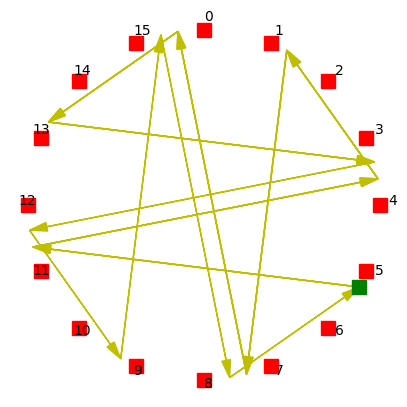

In [ ]:
z = (x + y) % 16
fig = plt.figure(figsize=(5,5))
plot_clock_face(16,fig,annotate = True)
plot_clock_path(16,z,fig)
#plt.axis('equal')
plt.axis('off')
plt.show()

___
**(c)** What are the periods of the pseudo-random sequences $x_n, y_n$ and $z_n$?
___

$x_n$=1,5,9,13,1...period is 4 \
$y_n$=1,2,4,1...period is 3 \
$z_n$=2,7,13,14,3,9,10,15,5,6,11,1,2...period is 12


___
___
## Question 2: inverting cdfs (25 pts)

In class, we defined $F^{-1}(y)$ for a continuous increasing cdf $F(x)$ as the unique $x$ such that $F(x) = y$ (for $y\in[0,1]$). More generally, for any cdf $F$ we can use the inversion method based on its generalized inverse or *pseudoinverse*:
	$$F^{-1}(y) = \inf\{x|F(x)\geq y\}$$
	(where $\inf$ denotes the \href{https://en.wikipedia.org/wiki/Infimum_and_supremum}{infimum}; if you have not seen this before, treat it as minimum).


___
**(a)** Find the pseudoinverse $F^{-1}(y)$ for the following mixed (discrete/continuous) cdf
	$$F(x)=
	\begin{cases}
	0 & \mbox{for $x < 0$}\\
	x & \mbox{for $0 \leq x < \frac{1}{2}$}, \\
	\frac{1}{2} & \mbox{for $\frac{1}{2}\leq x < 1$}, \\
	1 & \mbox{for $x\geq 1$}
	 \end{cases}$$
___

For $0\leq x<\frac{1}{2}(0<y<\frac{1}{2})$ \
$$F^{-1}(y) = \inf\{x|F(x)\geq y\}=\inf\{x|x\geq y\}=y$$
For $\frac{1}{2}\leq x<1(y = \frac{1}{2})$ \
$$F^{-1}(y) = \inf\{x|F(x)\geq y\}=\inf\{x|\frac{1}{2}\geq y\}=\frac{1}{2}$$
For $x \geq 1(\frac{1}{2}<y \leq 1)$ \
$$F^{-1}(y) = \inf\{x|F(x)\geq y\}=\inf\{x|1\geq y\}=1$$


___
**(b)** Use the above definition to get an inversion algorithm for the $Geometric(p)$ distribution (with pmf $p(k) = p(1-p)^{k-1}\,\forall\,k\in\{1,2,3,\ldots\}$). Implement this, and generate and plot the histogram of 1000 samples from a $Geometric(0.42)$ distribution.
(For this, it may be useful for you to first understand how the [scipy.stats](https://docs.scipy.org/doc/scipy/reference/stats.html) library works, and in particular, how it provides methods to compute various statistics for many different random variables, including the [geometric r.v.](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.geom.html#scipy.stats.geom))
___

For integer $k\ge 1$:
$$
F(k)=\mathbb{P}(X\le k)=1-(1-p)^k.
$$

Let $U\sim\text{Uniform}(0,1)$, solve $F(k)=U$
$$
1-(1-p)^k \geq U \\
k \ge \frac{\ln(1-U)}{\ln(1-p)} \\
X=\left\lceil \frac{\ln(1-U)}{\ln(1-p)} \right\rceil
$$


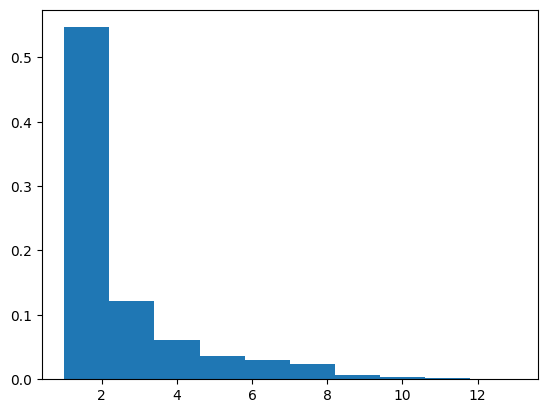

In [ ]:
p = 0.42
n_samples = 1000
U = np.random.uniform(0, 1, n_samples)
samples = np.ceil(np.log(1-U)/np.log(1-p)).astype(int)
plt.hist(samples, density=True)
plt.show()

___
**(c)** The p.d.f. of the random variable $X$ is given by
	$$
	f(x) =
	\begin{cases}
		e^{x-2} & \text{for }0 \leq x \leq 2, \\
		e^{-x} & \text{for }x > 2, \\
		0 & \text{otherwise,}
	\end{cases}
	$$
	Describe and implement an inversion algorithm to generate samples of $X$. Generate 1,000 samples and plot a histogram. Compare the histogram and the p.d.f.


For $0 \leq x \leq 2$:
$$
F(x) = \int_0^x e^{t-2} dt = e^{x-2} - e^{-2}.
$$
For $x=2$
$$
F(2) = 1 - e^{-2}.
$$
For $x > 2$:
$$
F(x) = (1 - e^{-2}) + \int_2^x e^{-t} dt = 1 - e^{-x}.
$$
Let $U \sim \text{Uniform}(0,1)$  
solve $F(x) = U$ \
If $0 \leq U \leq 1 - e^{-2}$
$$
U = e^{x-2} - e^{-2} \\
x = 2 + \ln(U + e^{-2}).
$$
If $1 - e^{-2} < U < 1$
$$
U = 1 - e^{-x} \\
x = -\ln(1-U).
$$
Thus, the inversion algorithm is:
$$
X =
\begin{cases}
2 + \ln\!\big(U + e^{-2}\big), & U \leq 1 - e^{-2}, \\
-\ln(1-U), & U > 1 - e^{-2}.
\end{cases}
$$

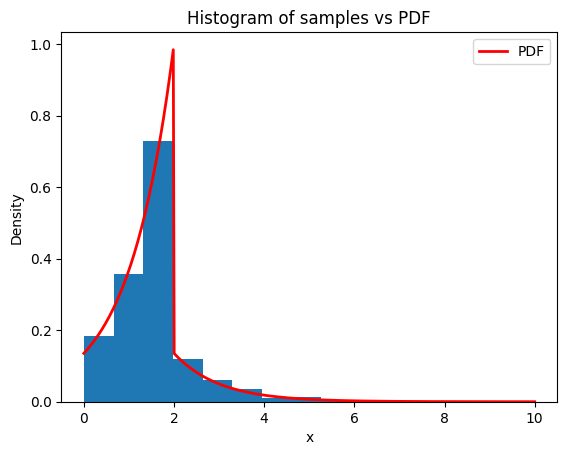

In [ ]:
samples = np.zeros_like(U)
F2 = 1 - np.exp(-2)
mask1 = U < F2
samples[mask1] = 2 + np.log(U[mask1] + np.exp(-2))
mask2 = ~mask1
samples[mask2] = -np.log(1 - U[mask2])
plt.hist(samples, density=True)
x_vals = np.linspace(0, 10, 500)
pdf = np.piecewise(x_vals,
                   [x_vals <= 2, x_vals > 2],
                   [lambda x: np.exp(x-2), lambda x: np.exp(-x)])
plt.plot(x_vals, pdf, 'r', lw=2, label='PDF')
plt.xlabel('x')
plt.ylabel('Density')
plt.title('Histogram of samples vs PDF')
plt.legend()
plt.show()

<hr><hr>

## Question 3: Acceptance-Rejection (25 pts)

Let the random variable $X$ have density
$$f(x) = \begin{cases} (5 x^4 + 4x^3 + 3x^2+1)/4  & \text{ for } 0 \leq x \leq 1, \\
0 & \text{ otherwise. } \end{cases}$$

<hr>

**(a)** Give an acceptance-rejection algorithm to generate samples of
	$X$.

<hr>

### Ans.


In [ ]:
import numpy as np

def f(x):
    return (5*x**4 + 4*x**3 + 3*x**2 + 1)/4.0

def ar_sample_f(n, seed=None):
    rng = np.random.default_rng(seed)
    a, b = 0.0, 1.0
    M = 13.0/4.0
    out = np.empty(n)
    k = 0
    while k < n:
        u1 = rng.random()
        u2 = rng.random()
        z1 = a + (b - a) * u1
        z2 = M * u2
        if z2 <= f(z1):
            out[k] = z1
            k += 1
    return out

if __name__ == "__main__":
    xs = ar_sample_f(100000, seed=42)
    mean_th = 0.25 * (5/6 + 4/5 + 3/4 + 1/2)
    print(f"Sample mean ≈ {xs.mean():.6f} ")


Sample mean ≈ 0.721235 


<hr>

**(b)** On average, how many samples from the uniform distribution over $[0, 1]$ would your acceptance-rejection algorithm need in order to generate one sample of $X$?

<hr>

### Ans.

In the acceptance--rejection algorithm with the rectangular method, the acceptance probability is given by
$$
\Pr(\text{accept}) \;=\; \frac{\int_0^1 f(x)\,dx}{M(b-a)}.
$$

Here $a=0$, $b=1$, and $M=\max_{x\in[0,1]} f(x) = f(1) = \tfrac{13}{4}$.

Since
$
\int_0^1 f(x)\,dx
= \frac{1}{4}\int_0^1 \big(5x^4+4x^3+3x^2+1\big)\,dx
= \frac{1}{4}(1+1+1+1) = 1,
$
we have

$
\Pr(\text{accept}) = \frac{1}{M} = \frac{4}{13} \approx 0.3077.
$

Therefore, the expected number of proposals required to accept one sample is
$
\mathbb{E}[\text{trials per accepted sample}]
= \frac{1}{\Pr(\text{accept})}
= M = \frac{13}{4} \approx 3.25.
$
The number of uniform samples = $2*trials=2*3.25=6.5$



<hr>

**(c)** Use your algorithm in (a) to generate 2,500 samples of $X$. Note that this will require more than 2500 uniform random variables.

Plot a histogram of your sample   and compare it against the true pdf.

<hr>

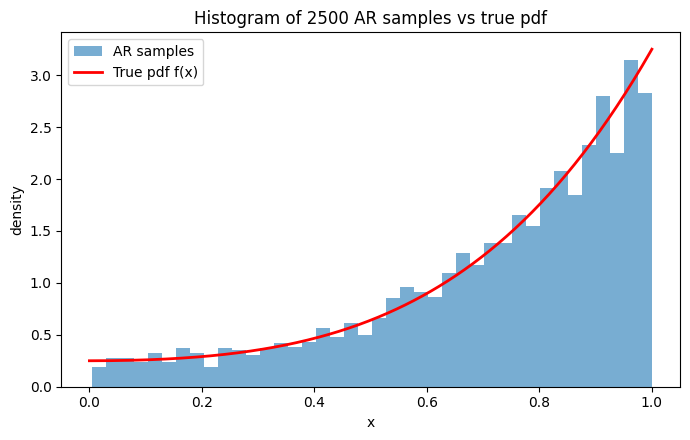

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

n = 2500
xs = ar_sample_f(n, seed=2025)

grid = np.linspace(0, 1, 400)
plt.figure(figsize=(7,4.5))
plt.hist(xs, bins=40, density=True, alpha=0.6, label="AR samples")
plt.plot(grid, f(grid), 'r-', lw=2, label="True pdf f(x)")
plt.xlabel("x"); plt.ylabel("density")
plt.title("Histogram of 2500 AR samples vs true pdf")
plt.legend(); plt.tight_layout(); plt.show()

<hr><hr>

## Question 4: Generalized Acceptance-Rejection (30 pts)

We want to generate a $\mathcal{N}(0,1)$ rv $X$, with pdf
$f(x) = \frac{e^{-x^2/2}}{\sqrt{2\pi}} $,
using generalized acceptance-rejection.

<hr>

**(a)** First, suppose we choose the proposal distribution to be a \emph{Laplace} (i.e., two-sided Exponential) distribution, which has pdf $g(x) = e^{-|x|}/2$. Describe (and implement) an inversion algorithm to get samples from this distribution.

<hr>

We want to sample from the Laplace distribution:

$$ g(x) = \tfrac{1}{2} e^{-|x|}, \quad x \in \mathbb{R}. $$

**CDF**

For $x < 0$:
$$ F(x) = \tfrac{1}{2} e^{x}. $$

For $x \ge 0$:
$$ F(x) = 1 - \tfrac{1}{2} e^{-x}. $$

**Inverse CDF**

Let $U \sim \text{Unif}(0,1)$. Then

$$
F^{-1}(U) =
\begin{cases}
\ln(2U), & U < 0.5, \\
-\ln(2(1-U)), & U \ge 0.5.
\end{cases}
$$

**Algorithm**

1. Sample $U \sim \text{Unif}(0,1)$  
2. If $U < 0.5$, set $X = \ln(2U)$  
3. Else, set $X = -\ln(2(1-U))$  

This gives one sample $X \sim \text{Laplace}(0,1)$.


In [ ]:
import numpy as np

def sample_laplace_inversion(n, seed=None):
    rng = np.random.default_rng(seed)
    U = rng.random(n)
    X = np.where(U < 0.5, np.log(2*U), -np.log(2*(1-U)))
    return X


<hr>

**(b)** Determine the smallest $k$ such that $kg(x)\geq f(x)\,\forall\,x\in\mathbb{R}$. Using this, propose (and implement) an acceptance-rejection algorithm for sampling $X\sim\mathcal{N}(0,1)$, and compute the expected number of samples needed for generating each sample.

<hr>

### Ans.
**Target density (standard normal):**

$$
f(x)=\frac{1}{\sqrt{2\pi}}\,e^{-x^{2}/2},\qquad x\in\mathbb R.
$$

**Proposal density (Laplace, two-sided exponential):**

$$
g(x)=\frac{1}{2}\,e^{-|x|},\qquad x\in\mathbb R.
$$

We need the smallest $k$ such that $k\,g(x)\ge f(x)$ for all $x$.
Equivalently,

$$
k\;\ge\;\sup_{x\in\mathbb R}\frac{f(x)}{g(x)}
=\frac{2}{\sqrt{2\pi}}\;\sup_{x\in\mathbb R}\; e^{-x^{2}/2+|x|}.
$$

Let $h(x)=-\frac{x^{2}}{2}+|x|$. Maximize $h$ piecewise:

* For $x\ge 0$: $h'(x)=-x+1=0\Rightarrow x=1$, $h(1)=\tfrac12$.
* For $x\le 0$: $h'(x)=-x-1=0\Rightarrow x=-1$, $h(-1)=\tfrac12$.

Thus $\sup h(x)=\tfrac12$ and

$$
k_{\min}\;=\;\frac{2}{\sqrt{2\pi}}\,e^{\,1/2}
\;=\;\sqrt{\frac{2e}{\pi}}
\;\approx\;1.31549.
$$




Accept $Y$ as a draw from $f$ with probability

$$
\alpha(Y)=\frac{f(Y)}{k_{\min}\,g(Y)}\;\le\;1.
$$

The acceptance probability under the optimal envelope is

$$
p_{\text{acc}}
=\int \frac{f(x)}{k_{\min}g(Y)}\,dx
=\frac{1}{k_{\min}},
$$

so the **expected number of proposals per accepted draw** is

$$
\mathbb E[\text{proposals per draw}]
=\frac{1}{p_{\text{acc}}}
=k_{\min}
=\sqrt{\frac{2e}{\pi}}
\approx 1.31549.
$$

**The expected number of uniforms per accepted draw** is

$$
2\,k_{\min}\;=\;2\sqrt{\frac{2e}{\pi}}\;\approx\;2.63098.
$$

**Final numeric answers:**

$$
k_{\min}=\sqrt{\tfrac{2e}{\pi}}\approx 1.3155,\qquad
\mathbb E[\text{proposals per draw}]=k_{\min}\approx 1.3155,\qquad
\mathbb E[\text{uniforms per draw}]=2k_{\min}\approx 2.6310.
$$


<hr>

**(c)** Generate $1000$ samples from your method in part (b), and plot the histogram of the samples. Also report the average and 95\% CI for the number of $U[0,1]$ samples needed to generate the $1000$ samples.

<hr>

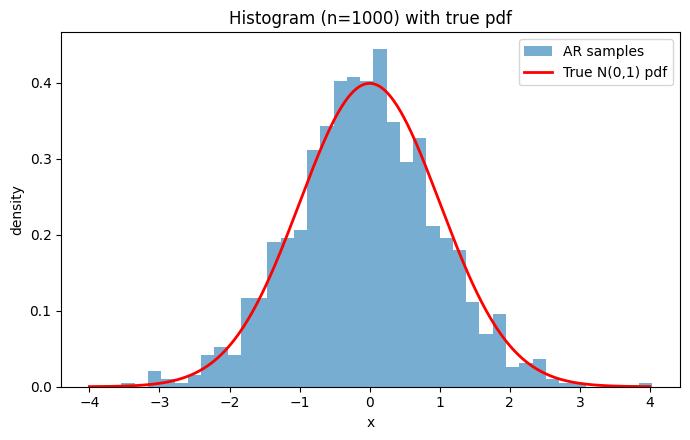

Uniform draws used (one run) = 2614
Average uniforms per sample (one run) = 2.6140
Theoretical 2k = 2.6310

== Uniform draws to produce 1000 samples ==
Monte Carlo mean ≈ 2629.0
95% CI ≈ [2625.4, 2632.6]
Theoretical expectation = 1000 * (2*k) ≈ 2631.0


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def f_norm(x):
    return np.exp(-0.5*x**2)/np.sqrt(2*np.pi)

def g_lap(x):
    return 0.5*np.exp(-np.abs(x))

def sample_laplace_inversion(n, rng):
    u = rng.random(n)
    return np.where(u < 0.5, np.log(2*u), -np.log(2*(1-u)))

def ar_normal_via_laplace(n, seed=None):
    rng = np.random.default_rng(seed)
    k = np.sqrt(2*np.e/np.pi)
    out = np.empty(n)
    i = 0
    trials = 0
    while i < n:
        y = sample_laplace_inversion(1, rng)[0]
        u = rng.random()
        if u <= f_norm(y)/(k*g_lap(y)):
            out[i] = y
            i += 1
        trials += 1
    uniforms_used = 2*trials
    return out, uniforms_used, k

n = 1000
xs, uniforms_used, k = ar_normal_via_laplace(n, seed=123)

grid = np.linspace(-4, 4, 500)
plt.figure(figsize=(7,4.5))
plt.hist(xs, bins=40, density=True, alpha=0.6, label="AR samples")
plt.plot(grid, f_norm(grid), 'r-', lw=2, label="True N(0,1) pdf")
plt.xlabel("x"); plt.ylabel("density"); plt.title("Histogram (n=1000) with true pdf")
plt.legend(); plt.tight_layout(); plt.show()
print(f"Uniform draws used (one run) = {uniforms_used}")
print(f"Average uniforms per sample (one run) = {uniforms_used/n:.4f}")
print(f"Theoretical 2k = {2*k:.4f}")

R = 500
totals = np.empty(R, dtype=float)
rng = np.random.default_rng(2025)

for r in range(R):
    xs_r, uniforms_r, _ = ar_normal_via_laplace(n, seed=rng.integers(1<<60))
    totals[r] = uniforms_r

mean_total = totals.mean()
sd_total = totals.std(ddof=1)
ci_low  = mean_total - 1.96 * sd_total / np.sqrt(R)
ci_high = mean_total + 1.96 * sd_total / np.sqrt(R)

print("\n== Uniform draws to produce 1000 samples ==")
print(f"Monte Carlo mean ≈ {mean_total:.1f}")
print(f"95% CI ≈ [{ci_low:.1f}, {ci_high:.1f}]")
print(f"Theoretical expectation = 1000 * (2*k) ≈ {1000*(2*k):.1f}")



In [ ]:
n = 1000
k = (2/np.sqrt(2*np.pi)) * np.exp(0.5)

mean_per = 2 * k*n
se_per   = np.sqrt(4 * k * (k - 1) / n)
ci_lo = mean_per - 1.96 * se_per*n
ci_hi = mean_per + 1.96 * se_per*n
print(f"Theoretical average uniforms per sample: {mean_per:.4f}")
print(f"95% CI (theoretical): [{ci_lo:.4f}, {ci_hi:.4f}]")


Theoretical average uniforms per sample: 2630.9785
95% CI (theoretical): [2551.1198, 2710.8372]


<hr>

**(d)** Now, suppose instead we choose the proposal distribution to be a Cauchy  distribution with pdf $g(x) = \frac{1}{\pi(1+x^2)}$. Describe and implement an inversion algorithm to get samples from this distribution, and plot the histogram of 1000 samples from this distribution.

<hr>

The cumulative distribution function is

$$
G(x) = \frac{1}{2} + \frac{1}{\pi}\arctan(x).
$$
For $U \sim \text{Unif}(0,1)$,

$$
X = G^{-1}(U) = \tan\!\big(\pi(U - 0.5)\big)
$$

follows the standard Cauchy distribution.\
Generate $U \sim \text{Unif}(0,1)$.\
Set $X = \tan\big(\pi(U - 0.5)\big)$.\
Repeat to obtain as many Cauchy samples as needed.\
Use this method to generate 1000 samples from the standard Cauchy distribution.
Plot the histogram of the simulated samples and compare with the true pdf.


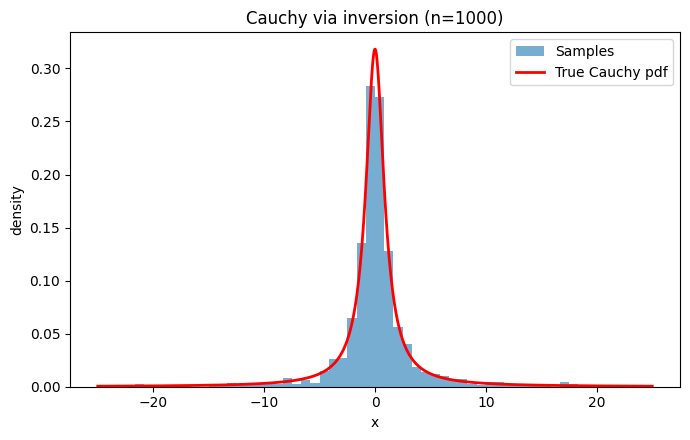

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def sample_cauchy_inversion(n, seed=None):
    rng = np.random.default_rng(seed)
    u = rng.random(n)
    return np.tan(np.pi*(u-0.5))

def cauchy_pdf(x):
    return 1/(np.pi*(1+x**2))

n = 1000
x = sample_cauchy_inversion(n, seed=123)

grid = np.linspace(-25, 25, 1000)
plt.figure(figsize=(7,4.5))
plt.hist(x, bins=60, range=(-25,25), density=True, alpha=0.6, label="Samples")
plt.plot(grid, cauchy_pdf(grid), 'r-', lw=2, label="True Cauchy pdf")
plt.xlabel("x"); plt.ylabel("density"); plt.title("Cauchy via inversion (n=1000)")
plt.legend(); plt.tight_layout(); plt.show()


<hr>

**(e)** Repeat parts $(b)$ and $(c)$ for this proposal distribution.

<hr>

### Ans.
**Target:**
$$
f(x) = \frac{1}{\sqrt{2\pi}} e^{-x^{2}/2}
$$

**Proposal:**
$$
g(x) = \frac{1}{\pi (1+x^{2})}
$$

**Minimal k:**
$$
k_{\min} = \sup_{x \in \mathbb{R}} \frac{f(x)}{g(x)}
= \frac{\pi}{\sqrt{2\pi}} \sup_{x \in \mathbb{R}} (1+x^{2}) e^{-x^{2}/2}.
$$

Let
$$
t = x^{2}, \quad h(t) = (1+t) e^{-t/2}.
$$

Take derivative:
$$
\frac{d}{dt}\log h(t) = \frac{1}{1+t} - \frac{1}{2} = 0 \;\;\Rightarrow\;\; t=1.
$$

So,
$$
h_{\max} = 2e^{-1/2}.
$$

Therefore,
$$
k_{\min} = \frac{\pi}{\sqrt{2\pi}} \cdot 2 e^{-1/2}
= \sqrt{\frac{2\pi}{e}} \approx 1.5203.
$$


**Expected cost:**

Acceptance probability:
$$
\mathbb{P}(\text{accept}) = \frac{1}{k_{\min}}.
$$

Expected number of proposals per accepted sample:
$$
\mathbb{E}[\text{proposals}] = k_{\min}.
$$

Each proposal requires 2 uniforms (one for inversion, one for acceptance), so
$$
\mathbb{E}[\text{uniform draws}] = 2k_{\min} = 2\sqrt{\frac{2\pi}{e}} \approx 3.0406.
$$


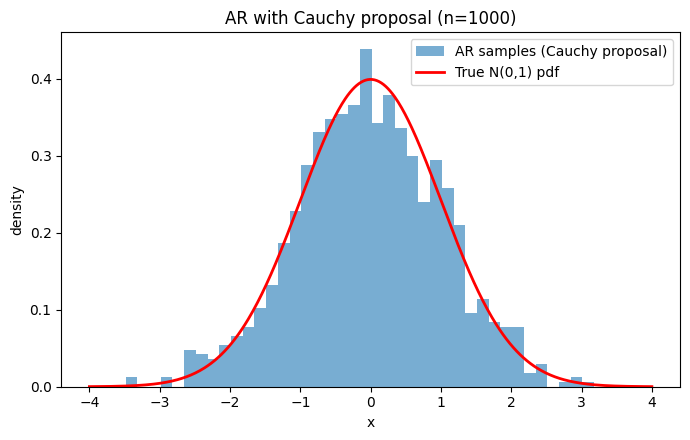

Uniform draws used (one run) = 3020
Average uniforms per sample (one run) = 3.0200
Theoretical uniforms per sample = 2*k = 3.0407

== Uniform draws to produce 1000 samples over replications ==
Monte Carlo mean = 3039.4
95% CI = [3034.7, 3044.2]
Theoretical expectation = 3040.7


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def f_norm(x):
    return np.exp(-0.5*x**2)/np.sqrt(2*np.pi)

def g_cauchy(x):
    return 1/(np.pi*(1+x**2))

def sample_cauchy_inversion(n, rng):
    u = rng.random(n)
    return np.tan(np.pi*(u-0.5))

def ar_normal_via_cauchy(n, seed=None):
    rng = np.random.default_rng(seed)
    k = np.sqrt(2*np.pi/np.e)
    out = np.empty(n)
    i, trials = 0, 0
    while i < n:
        y = sample_cauchy_inversion(1, rng)[0]
        u = rng.random()
        if u <= f_norm(y)/(k*g_cauchy(y)):
            out[i] = y
            i += 1
        trials += 1
    uniforms_used = 2*trials
    return out, uniforms_used, k

n = 1000
xs, uniforms_used, k = ar_normal_via_cauchy(n, seed=42)

grid = np.linspace(-4, 4, 500)
plt.figure(figsize=(7,4.5))
plt.hist(xs, bins=40, density=True, alpha=0.6, label="AR samples (Cauchy proposal)")
plt.plot(grid, f_norm(grid), 'r-', lw=2, label="True N(0,1) pdf")
plt.xlabel("x"); plt.ylabel("density"); plt.title("AR with Cauchy proposal (n=1000)")
plt.legend(); plt.tight_layout(); plt.show()

print(f"Uniform draws used (one run) = {uniforms_used}")
print(f"Average uniforms per sample (one run) = {uniforms_used/n:.4f}")
print(f"Theoretical uniforms per sample = 2*k = {2*k:.4f}")

R = 500
totals = np.empty(R, dtype=float)
rng = np.random.default_rng(2025)
for r in range(R):
    _, u_used, _ = ar_normal_via_cauchy(n, seed=rng.integers(1<<60))
    totals[r] = u_used

mean_total = totals.mean()
sd_total = totals.std(ddof=1)
ci_low  = mean_total - 1.96 * sd_total / np.sqrt(R)
ci_high = mean_total + 1.96 * sd_total / np.sqrt(R)

print("\n== Uniform draws to produce 1000 samples over replications ==")
print(f"Monte Carlo mean = {mean_total:.1f}")
print(f"95% CI = [{ci_low:.1f}, {ci_high:.1f}]")
print(f"Theoretical expectation = {1000*(2*k):.1f}")


Proposal: Cauchy(0,1),  
$$ g(x)=\frac{1}{\pi(1+x^2)}. $$

From part (d), the optimal AR constant is  
$$ k = k_{\min} = \sqrt{\frac{2\pi}{e}} \approx 1.5203, \qquad p=\frac{1}{k}. $$

For one accepted sample, trials \(T\sim\text{Geom}(p)\) (support {1,2,…}):
$$ E[T]=k,\quad Var(T)=k(k-1). $$

For \(n\) accepted samples, total trials \(S=\sum_{i=1}^n T_i\):
$$ E[S]=nk,\quad Var(S)=n\,k(k-1). $$

Each trial uses 2 uniforms ⇒ total uniforms \(U=2S\):
$$ E[U]=2nk,\qquad SD(U)=2\sqrt{n\,k(k-1)}. $$

95% CI (normal approximation):
$$ E[U]\ \pm\ 1.96\,SD(U) \;=\; 2nk \ \pm\ 1.96\cdot 2\sqrt{n\,k(k-1)}. $$

**Numerical result for n = 1000, k = √(2π/e) ≈ 1.5203:**

- Mean: E[U] ≈ 3040.6  
- Standard deviation: SD(U) ≈ 56.2  
- 95% CI: [2930.4, 3150.8]

